In [1]:
import os
import json
import pandas as pd
import numpy as np

import spacy
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the spaCy model
nlp = spacy.load('de_core_news_md')

# Define the directory containing the JSON files
corpus_directory = 'corpus_finished'

# Initialize lists to store the data
titles = []
categories = []
genders = []
authors = []
poems = []
line_data = []

# Iterate over the JSON files
for file_name in os.listdir(corpus_directory):
    with open(os.path.join(corpus_directory, file_name), 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract the data from the JSON
    titles.append(data['title'])
    categories.append(data['categories'])
    genders.append(data['gender'])
    authors.append(data['author'])
    
    poem_lines = [line_info['text'] for line_info in data['poem'].values() if 'text' in line_info]
    poems.append(' '.join(poem_lines))
    line_data.append(poem_lines)

# Tokenize the poem using spaCy
tokenized_poems = []
for poem in poems:
    doc = nlp(poem)
    tokens = [token.text for token in doc]
    tokenized_poems.append(tokens)

# Create a DataFrame
df = pd.DataFrame({
    'title': titles,
    'categories': categories,
    'gender': genders,
    'author': authors,
    'poem': poems,
    'line_data': line_data,
    'tokenized_poem': tokenized_poems
})
df['num_tokens'] = df['tokenized_poem'].apply(lambda x: len(x))

df


,title,categories,gender,author,poem,line_data,tokenized_poem
0,125-episoden-imonki-16200,"[Leben & Beziehungen, Ehe, Verlust & Trennung,...",m,Alexandru Bulucz,125 Episoden Monk . In Worten: einhundertfnfun...,"[125 Episoden, Monk, . In Worten: einhundertfn...","[125, Episoden, Monk, ., In, Worten, :, einhun..."
1,aber-wir-werden-durch-den-abend-11566,[Leben & Beziehungen],m,Michael Donhauser,Aber wir werden durch den Abend ewige Gebrde l...,"[Aber wir werden, durch den Abend, ewige Gebrd...","[Aber, wir, werden, durch, den, Abend, ewige, ..."
2,alemannische-mangos-15731,"[Natur, Pflanzen]",w,Marie T. Martin,Wenn die Zweige zum Boden geneigt sind kannst ...,[Wenn die Zweige zum Boden geneigt sind kannst...,"[Wenn, die, Zweige, zum, Boden, geneigt, sind,..."
3,alles-was-wir-tun-ist-musik-john-cage-13426,"[Musik, Popkultur, Natur, Pflanzen]",m,Volker Sielaff,Der Regentag bietet sich an gebietet sich der ...,[Der Regentag bietet sich an gebietet sich der...,"[Der, Regentag, bietet, sich, an, gebietet, si..."
4,alp-11834,"[Humoristische Poesie, Leben & Beziehungen]",m,Steffen Jacobs,Wir sind der Welt aufs Dach gestiegen. Die Aus...,"[Wir sind der Welt, aufs Dach gestiegen. Die, ...","[Wir, sind, der, Welt, aufs, Dach, gestiegen, ..."
...,...,...,...,...,...,...,...
226,wolkenformeln-13978,"[Dichtung, Natur, Sommer, Winter, Landschaft]",m,Jan Volker Röhnert,"Die Trume des Himmels, sagtest du im Schlaf, w...","[Die Trume des Himmels, sagtest du im Schlaf,,...","[Die, Trume, des, Himmels, ,, sagtest, du, im,..."
227,wyoming-13239,"[Identität (Individuum), Religion / Spirituali...",m,Mirko Bonné,"Wenn wir ber die Wldergrenze hinausgingen, in ...","[Wenn wir ber die Wldergrenze hinausgingen,, i...","[Wenn, wir, ber, die, Wldergrenze, hinausginge..."
228,zersprengte-neuigkeiten-14345,"[Leben & Beziehungen, Sprache]",m,Alexander Gumz,"ich bin wtend auf sprache, auf alles, was mit ...","[ich bin wtend auf sprache, auf alles,, was mi...","[ich, bin, wtend, auf, sprache, ,, auf, alles,..."
229,zwangsmittel-12267,"[Medizin & Naturwissenschaft, Natur]",m,Léonce W. Lupette,Nicht nur der Paraguayjasmin zittert eine olfa...,"[Nicht nur, der Paraguayjasmin zittert, eine o...","[Nicht, nur, der, Paraguayjasmin, zittert, ein..."


In [3]:
def get_unique_categories(df):
    unique_categories = set()
    for category_list in df['categories']:
        unique_categories.update(category_list)
    return list(unique_categories)


In [4]:
def count_unique_categories(df, gender='both'):
    if gender == 'both':
        category_counts = df['categories'].explode().value_counts()
    else:
        filtered_df = df[df['gender'] == gender]
        category_counts = filtered_df['categories'].explode().value_counts()
    
    return category_counts


In [5]:
def category_counts_by_gender(df, gender):
    if gender not in ['w', 'm']:
        raise ValueError("Invalid gender input. Please provide 'w' or 'm'.")
    
    category_counts = df[df['gender'] == gender]['categories'].explode().value_counts()
    return category_counts

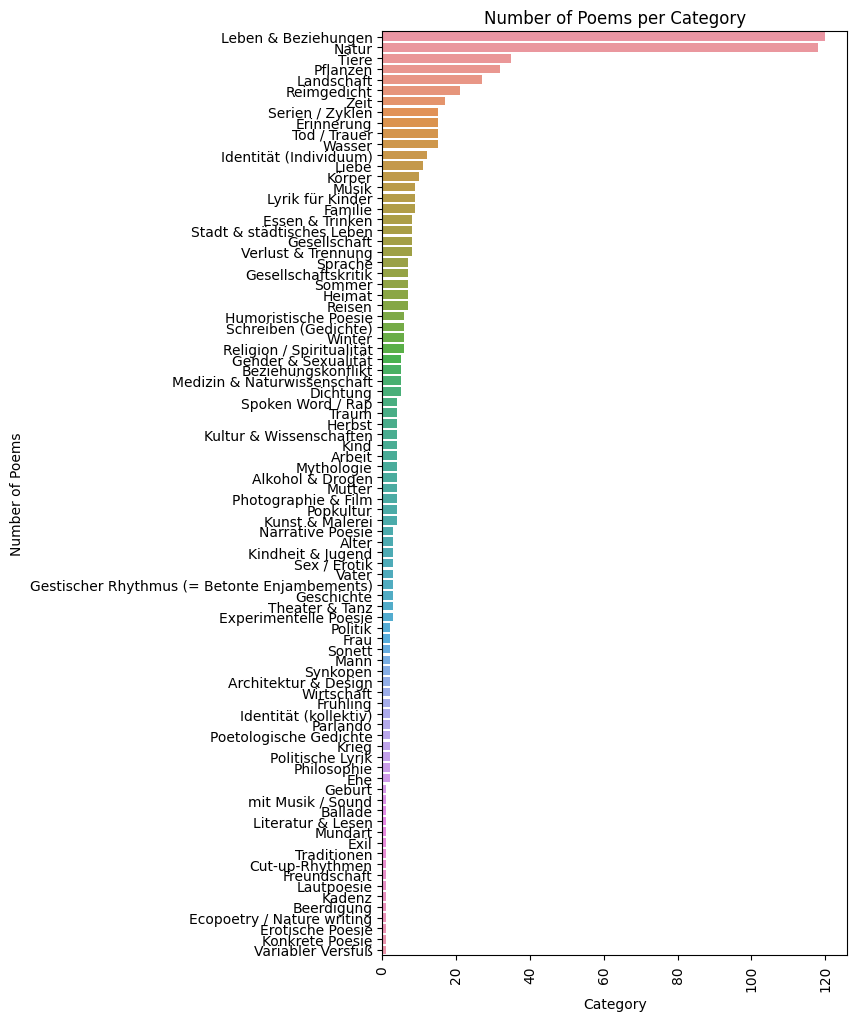

In [6]:
category_counts = df['categories'].explode().value_counts()
plt.figure(figsize=(6, 12))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.xlabel('Category')
plt.ylabel('Number of Poems')
plt.title('Number of Poems per Category')
plt.xticks(rotation=90)
plt.show()

In [7]:
"""# TO FIX

fig, ax = plt.subplots(figsize=(10, 12))
bar_width = 0.9

# Get category labels for y-axis
category_labels = get_unique_categories(df)

# Plot male population on the left side
category_values_m = category_counts_by_gender(df, 'm')
sns.barplot(x=-np.array(category_values_m), y=category_labels, ax=ax, dodge=True, width=bar_width)


# Plot female population on the right side
category_values_w = category_counts_by_gender(df, 'w')
sns.barplot(x=np.array(category_values_w), y=category_labels, ax=ax, dodge=True, width=bar_width)

# Set x-axis limits
ax.set_xlim(-max(max(category_values_m), max(category_values_w)) - 5,
            max(max(category_values_m), max(category_values_w)) + 5)

# Set labels and title
ax.set_xlabel('m - Size - f')
ax.set_ylabel('Category')
ax.set_title('Category Distribution')

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for y in range(len(category_labels)):
    plt.axhline(y, color='gray', linestyle='-.', linewidth=0.1)
plt.axvline(x=0, color="black", linestyle='-', linewidth=0.2)

# Show the plot
plt.show()"""

'# TO FIX\n\nfig, ax = plt.subplots(figsize=(10, 12))\nbar_width = 0.9\n\n# Get category labels for y-axis\ncategory_labels = get_unique_categories(df)\n\n# Plot male population on the left side\ncategory_values_m = category_counts_by_gender(df, \'m\')\nsns.barplot(x=-np.array(category_values_m), y=category_labels, ax=ax, dodge=True, width=bar_width)\n\n\n# Plot female population on the right side\ncategory_values_w = category_counts_by_gender(df, \'w\')\nsns.barplot(x=np.array(category_values_w), y=category_labels, ax=ax, dodge=True, width=bar_width)\n\n# Set x-axis limits\nax.set_xlim(-max(max(category_values_m), max(category_values_w)) - 5,\n            max(max(category_values_m), max(category_values_w)) + 5)\n\n# Set labels and title\nax.set_xlabel(\'m - Size - f\')\nax.set_ylabel(\'Category\')\nax.set_title(\'Category Distribution\')\n\n# Remove spines\nax.spines[\'left\'].set_visible(False)\nax.spines[\'right\'].set_visible(False)\nax.spines[\'top\'].set_visible(False)\n\nfor y i

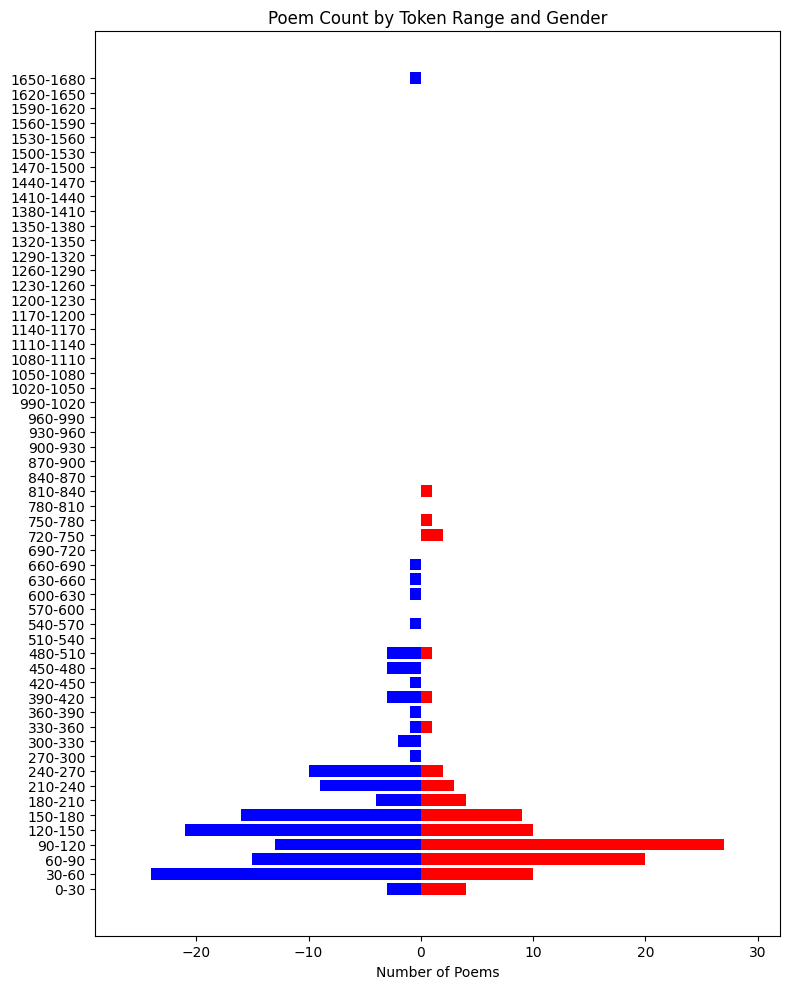

In [36]:
# Define the token range intervals
num_tokens_m = df.loc[df['gender'] == 'm', 'num_tokens']
num_tokens_w = df.loc[df['gender'] == 'w', 'num_tokens']
token_intervals = np.arange(0, max(max(num_tokens_m), max(num_tokens_w))+30, 30)

# Group the indices based on token ranges
indices_m_grouped = [np.where((num_tokens_m >= token_intervals[i]) & (num_tokens_m < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]
indices_w_grouped = [np.where((num_tokens_w >= token_intervals[i]) & (num_tokens_w < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]

# Count the number of poems in each token range
counts_m = [len(indices) for indices in indices_m_grouped]
counts_w = [len(indices) for indices in indices_w_grouped]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the number of poems for 'm' on the left side
ax.barh(range(len(counts_m)), -np.array(counts_m), color='blue', align='center')

# Plot the number of poems for 'w' on the right side
ax.barh(range(len(counts_w)), np.array(counts_w), color='red', align='center')

# Set y-axis tick positions and labels
yticks = range(len(token_intervals) - 1)
yticklabels = [f"{token_intervals[i]}-{token_intervals[i+1]}" for i in range(len(token_intervals) - 1)]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Set x-axis label and title
ax.set_xlabel('Number of Poems')
ax.set_title('Poem Count by Token Range and Gender')

# Set the x-axis limits based on the maximum number of poems
ax.set_xlim(-max(counts_m) - 5, max(counts_w) + 5)
plt.tight_layout()

# Show the plot
plt.show()
